In [1]:
import pprint
import owslib
from owslib.wcs import WebCoverageService

In [2]:
t = WebCoverageService('http://earthserver.pml.ac.uk/rasdaman/ows?', version='2.0.0')
pprint.pprint( t.contents)

http://earthserver.pml.ac.uk/rasdaman/ows?service=WCS&request=GetCapabilities&version=2.0.0
{'CCI_V2_monthly_Rrs_412': <owslib.coverage.wcs200.ContentMetadata object at 0x21fd610>,
 'CCI_V2_monthly_Rrs_443': <owslib.coverage.wcs200.ContentMetadata object at 0x21fd1d0>,
 'CCI_V2_monthly_Rrs_490': <owslib.coverage.wcs200.ContentMetadata object at 0x21fdc10>,
 'CCI_V2_monthly_Rrs_510': <owslib.coverage.wcs200.ContentMetadata object at 0x21fd510>,
 'CCI_V2_monthly_Rrs_555': <owslib.coverage.wcs200.ContentMetadata object at 0x21fd6d0>,
 'CCI_V2_monthly_Rrs_670': <owslib.coverage.wcs200.ContentMetadata object at 0x21fde50>,
 'CCI_V2_monthly_chlor_a': <owslib.coverage.wcs200.ContentMetadata object at 0x21fdcd0>,
 'CCI_V2_monthly_chlor_a_bias': <owslib.coverage.wcs200.ContentMetadata object at 0x21fd390>,
 'CCI_V2_monthly_chlor_a_rmsd': <owslib.coverage.wcs200.ContentMetadata object at 0x21fd690>,
 'CCI_V2_monthly_rrs_412': <owslib.coverage.wcs200.ContentMetadata object at 0x21fda90>,
 'CCI_V2

In [3]:
out = t.getCoverage(identifier=['CCI_V2_monthly_chlor_a_bias'], format='application/netcdf', subsets=[('Long',-10,0), ('Lat',40,50),('ansi',145883,145884)])

WCS 2.0.0 DEBUG: Second part of URL: format=application%2Fnetcdf&version=2.0.0&request=GetCoverage&service=WCS&CoverageID=CCI_V2_monthly_chlor_a_bias&subset=Long%28-10%2C0%29&subset=Lat%2840%2C50%29&subset=ansi%28145883%2C145884%29
http://earthserver.pml.ac.uk/rasdaman/ows


In [4]:
with open('testout.nc', 'w') as outfile:
    outfile.write(out.read())


In [5]:
%matplotlib inline
import numpy as np
import matplotlib as mb

In [8]:
import netCDF4 as nc

ncdata = nc.Dataset("testout.nc", "a", format="NETCDF4")
ncdata.variables['chlor_a_log10_bias'].setncattr('missing_value', 9.969209968386869e+36)



In [48]:
from mpl_toolkits.basemap import Basemap

(239, 241)


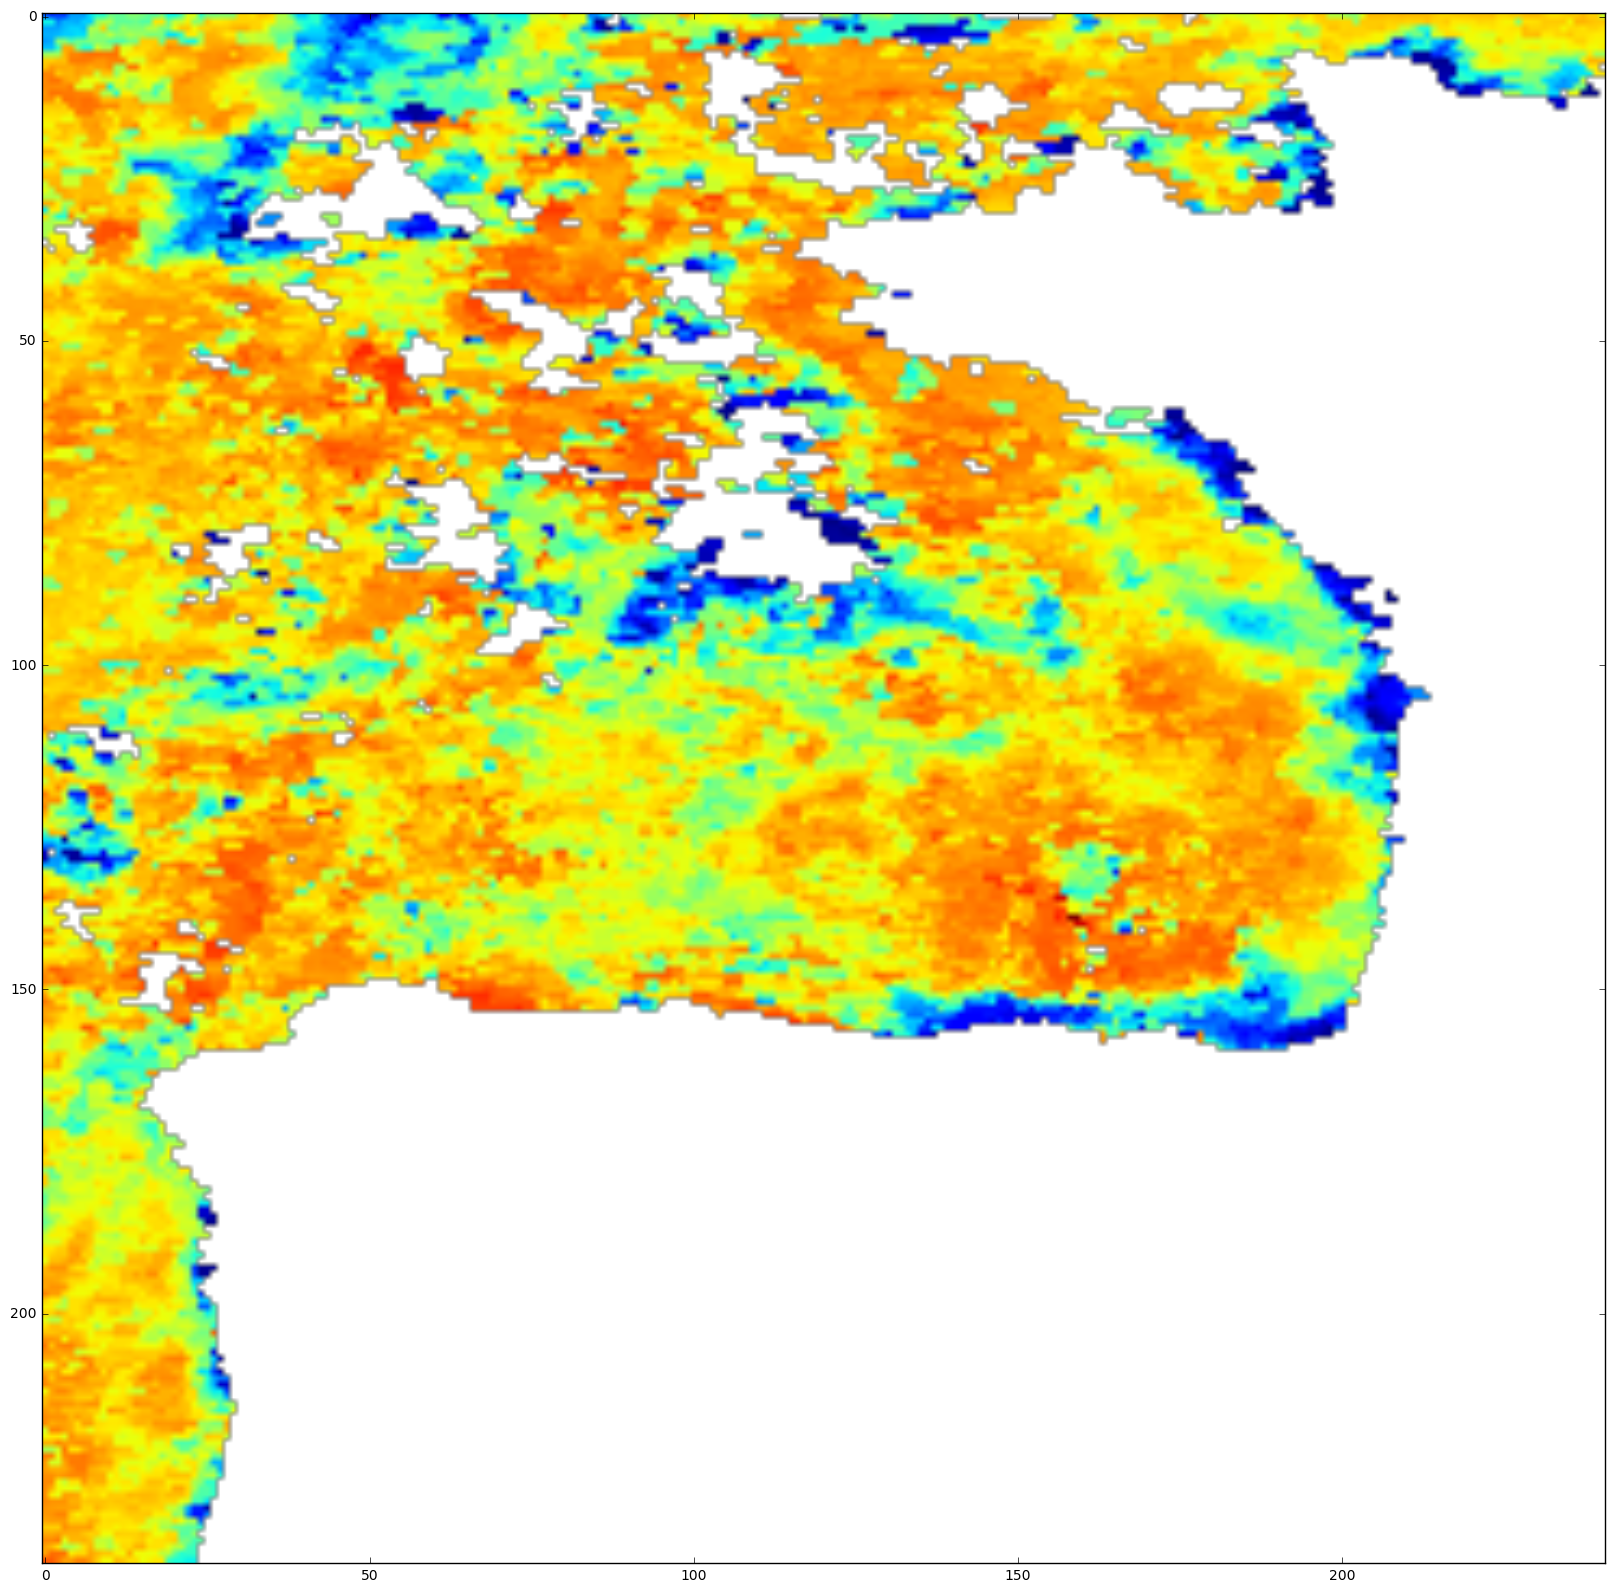

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt

data = np.flipud(np.rot90(ncdata.variables['chlor_a_log10_bias'][:,:,0]))

print data.shape



plt.figure(figsize=(40,20))
plt.imshow(data) 



(239, 241)
(239,)
[ 40.          40.04166666  40.08333332  40.12499999  40.16666665
  40.20833331  40.24999997  40.29166663  40.3333333   40.37499996
  40.41666662  40.45833328  40.49999994  40.54166661  40.58333327
  40.62499993  40.66666659  40.70833325  40.74999992  40.79166658
  40.83333324  40.8749999   40.91666656  40.95833322  40.99999989
  41.04166655  41.08333321  41.12499987  41.16666653  41.2083332
  41.24999986  41.29166652  41.33333318  41.37499984  41.41666651
  41.45833317  41.49999983  41.54166649  41.58333315  41.62499982
  41.66666648  41.70833314  41.7499998   41.79166646  41.83333313
  41.87499979  41.91666645  41.95833311  41.99999977  42.04166644
  42.0833331   42.12499976  42.16666642  42.20833308  42.24999975
  42.29166641  42.33333307  42.37499973  42.41666639  42.45833306
  42.49999972  42.54166638  42.58333304  42.6249997   42.66666637
  42.70833303  42.74999969  42.79166635  42.83333301  42.87499967
  42.91666634  42.958333    42.99999966  43.04166632  43.08

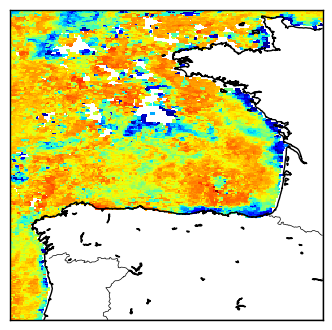

In [29]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

data = np.rot90(ncdata.variables['chlor_a_log10_bias'][:,:,0])
lats = ncdata.variables['Lat'][:]
lons = ncdata.variables['Long'][:]

print data.shape

print lats.shape
print lats

print lons.shape
print lons[0]
print lons[1]

m = Basemap(lon_0=lons[0], llcrnrlon=lons[0], llcrnrlat=lats[0], urcrnrlon=lons[-1],urcrnrlat=lats[-1], resolution='h')
m.drawmapboundary(fill_color='0.3')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary()
im1 = m.pcolormesh(lons,lats,data,shading='flat',cmap=plt.cm.jet,latlon=True)